<a href="https://colab.research.google.com/github/montblanc-1981/data-analysis-basic-kadai/blob/main/optuna/kadai_optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np


In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')


<Axes: xlabel='ds', ylabel='y'>

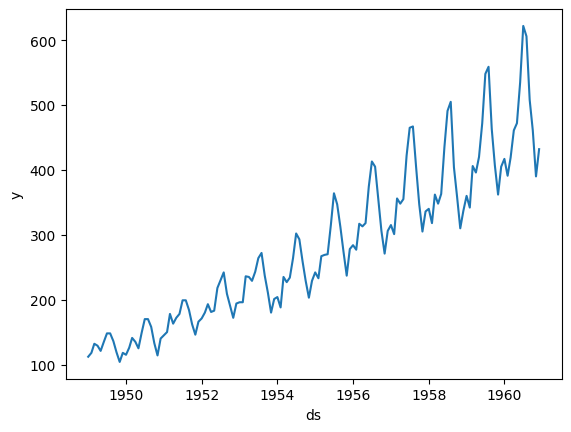

In [27]:
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])


In [28]:
from prophet import Prophet
model = Prophet()


In [29]:
model.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7f7u9ht6/yza2o4fx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7f7u9ht6/wb9y9vd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29810', 'data', 'file=/tmp/tmp7f7u9ht6/yza2o4fx.json', 'init=/tmp/tmp7f7u9ht6/wb9y9vd5.json', 'output', 'file=/tmp/tmp7f7u9ht6/prophet_model9mwpxsxo/prophet_model-20231125042440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future = model.make_future_dataframe(periods=36, freq='MS')
future


,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [31]:
forecast = model.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,57.273537,115.038332,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,50.800453,108.429715,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,81.599774,140.862892,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,81.374390,137.142084,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,85.467350,142.393160,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,583.129515,623.541803,678.154556,580.303615,585.680218,67.604288,67.604288,67.604288,67.604288,67.604288,67.604288,0.0,0.0,0.0,650.733803
176,1963-09-01,586.261164,573.880171,632.094397,583.273222,589.000637,17.222424,17.222424,17.222424,17.222424,17.222424,17.222424,0.0,0.0,0.0,603.483588
177,1963-10-01,589.291792,539.815033,594.869415,586.141434,592.132021,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,0.0,0.0,0.0,567.259613
178,1963-11-01,592.423441,506.755598,562.982432,589.204166,595.403224,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,0.0,0.0,0.0,535.439784


In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,86.018883,57.273537,115.038332
1,1949-02-01,79.495226,50.800453,108.429715
2,1949-03-01,111.025581,81.599774,140.862892
3,1949-04-01,108.719017,81.374390,137.142084
4,1949-05-01,112.095281,85.467350,142.393160
...,...,...,...,...
175,1963-08-01,650.733803,623.541803,678.154556
176,1963-09-01,603.483588,573.880171,632.094397
177,1963-10-01,567.259613,539.815033,594.869415
178,1963-11-01,535.439784,506.755598,562.982432


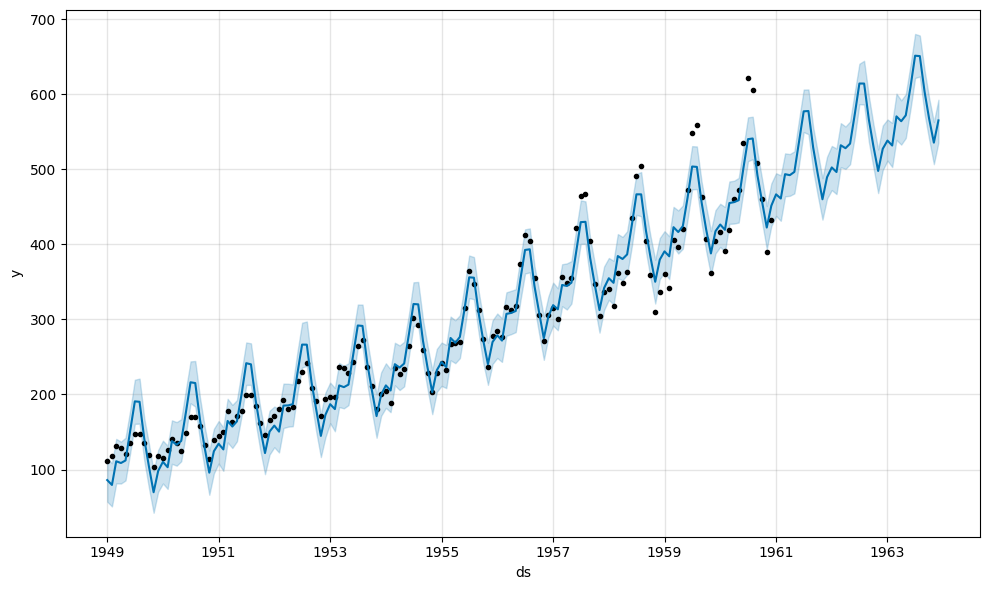

In [33]:
fig_forecast = model.plot(forecast)


In [34]:
cutoffs = pd.to_datetime(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'])


In [35]:
from prophet.diagnostics import cross_validation


In [36]:
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7f7u9ht6/8e_ge1wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7f7u9ht6/ee2gjgcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86629', 'data', 'file=/tmp/tmp7f7u9ht6/8e_ge1wp.json', 'init=/tmp/tmp7f7u9ht6/ee2gjgcs.json', 'output', 'file=/tmp/tmp7f7u9ht6/prophet_modelp_4pvd5g/prophet_model-20231125042511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:25:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:25:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7f7u9ht6/w_t5lycx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7f7u9ht6/uza3cfum.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [37]:
df_cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1955-01-01,237.821995,226.250307,248.749785,242,1954-12-01
1,1955-02-01,241.792078,230.426778,253.059211,233,1954-12-01
2,1955-03-01,267.141230,256.936116,278.714977,267,1954-12-01
3,1955-04-01,257.744480,246.637417,268.604561,269,1954-12-01
4,1955-05-01,261.961916,250.707373,273.734866,270,1954-12-01
...,...,...,...,...,...,...
139,1960-08-01,548.443272,528.898632,569.093675,606,1957-12-01
140,1960-09-01,511.578231,491.711630,532.248908,508,1957-12-01
141,1960-10-01,480.747994,461.340214,501.951558,461,1957-12-01
142,1960-11-01,455.417988,434.433014,476.625563,390,1957-12-01


In [38]:
from prophet.diagnostics import performance_metrics


In [39]:
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,121 days,687.400156,26.218317,19.285619,0.060133,0.039788,0.057291,0.535714
1,122 days,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.571429
2,151 days,644.424799,25.385523,18.070242,0.055246,0.032945,0.052755,0.607143
3,152 days,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.642857
4,182 days,583.584697,24.157498,17.463575,0.050684,0.030947,0.050311,0.595238


In [40]:
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.571429
1,5,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.642857
2,6,676.263707,26.005071,19.591839,0.056243,0.030947,0.056366,0.535714
3,7,1338.378492,36.583856,29.852167,0.078469,0.091159,0.081789,0.357143
4,8,1849.989022,43.011499,38.904615,0.097044,0.107401,0.102882,0.178571


<Axes: xlabel='horizon', ylabel='mse'>

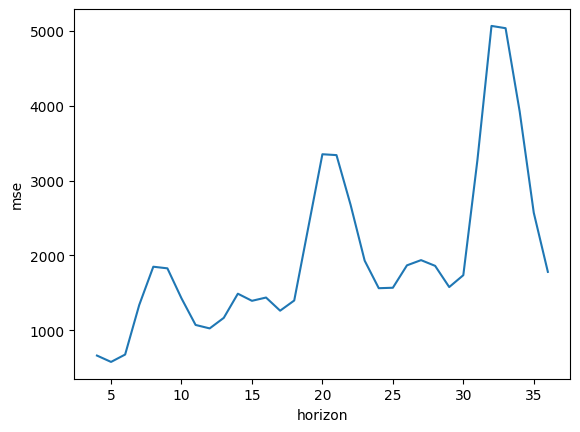

In [41]:
sns.lineplot(x='horizon', y='mse', data=df_p)


<Axes: xlabel='horizon', ylabel='coverage'>

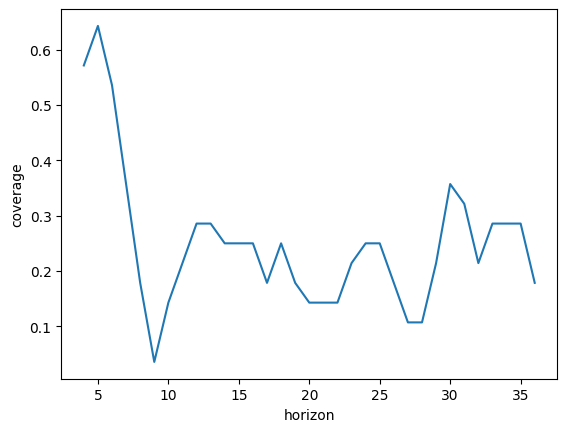

In [42]:
sns.lineplot(x='horizon', y='coverage', data=df_p)


In [43]:
pip install optuna

In [53]:
import optuna

def objective(trial):
    params = {
             'changepoint_prior_scale' : trial.suggest_discrete_uniform('changepoint_prior_scale',0.05,0.5,0.001),
             'seasonality_prior_scale' : trial.suggest_discrete_uniform('seasonality_prior_scale',10,10,0.01),
             'holidays_prior_scale' : trial.suggest_discrete_uniform('holidays_prior_scale',10,10,0.01)
    }
    m=Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        holidays_prior_scale=params['holidays_prior_scale']
    )

    m.fit(df)
    future2 = m.make_future_dataframe(periods=36, freq='MS')
    forecast2 = m.predict(future2)
    df_cv2 = cross_validation(m, horizon = '1096 days', cutoffs=cutoffs)
    df_p2 = performance_metrics(df_cv2)

    #return mse

#study = optuna.create_study()
#study.optimize(objective, n_trials=100)
#print(study.best_params)
